In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [14]:
def is_fininshed(k, kmax, grad_f, xk, xk_1, x0, tolf, tolx):
    flag_rel = np.linalg.norm(grad_f(xk))**2 < (tolf * np.linalg.norm(grad_f(x0))**2)
    flag_abs = np.linalg.norm(xk-xk_1)**2 < tolx
    return k>=kmax or (flag_rel and flag_abs)

In [15]:
def armijo_alpha(f, grad_f, x):
    '''
    Gets the right alpha to satisfy the armijo rule (or sufficient decrease condition)
    '''
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2: # "non" sufficient decrease condition (only when it leaves the loop it is <=)
        # decrease alpha
        alpha = tau * alpha
        if alpha < 1e-3:
            # stopping condition to avoid too long loops
            break
    
    return alpha

In [16]:
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha_type, alpha_value=1e-3):
    '''
    Input:
        f: the function f(x) we want to optimize. It is supposed to be a Python function, not an array.
        grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
        x0: an n-dimensional array which represents the initial iterate.
        kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
        tolf: small float. The relative tollerance of the algorithm. Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
        tolx: small float. The tollerance in the input domain. Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
    
    Output:
        x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
        k: an integer. The number of iteration needed to converge. k < kmax.
        f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
        grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
        err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.
    '''

    x = [x0]
    k = 0
    flag = True
    
    while flag:

        if alpha_type == "constant":
            alpha = alpha_value
        elif alpha_type == "armijo":
            alpha = armijo_alpha(f, grad_f, x[k])
        else:
            raise NotImplementedError("The alpha type '{}' is not implemented yet".format(alpha_type))

        new_value = x[k] - alpha * grad_f(x[k])
        x.append(new_value)
        k += 1
        flag = not is_fininshed(k, kmax, grad_f, x[-1], x[-2], x[0], tolf, tolx)

    grads = [grad_f(xk) for xk in x]
    return \
        x, \
        k, \
        [f(xk) for xk in x], \
        grads, \
        [np.linalg.norm(e)**2 for e in grads]


Gd with backtracking, GD without (trying different alphas)

plot norm of grad_f (check total number of iterations in different cases)

fix x=np.zeros(n), kmax=100, tolf/tolx <= 10^-6

plot norm(xk-xTRUE) if available

In [17]:
def function_1(x):
    x1, x2 = x[0], x[1]
    return (x1-3)**2 + (x2-1)**2

def func_1_for_contour(x, y):
    return (x-3)**2 + (y-1)**2

def grad_1(x):
    x1, x2 = x[0], x[1]
    return np.array([2*(x1-3),2*(x2-1)])

x_true = np.array([3, 1])

In [18]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":1e-1, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":8e-2, "legend":"8e-2"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
]

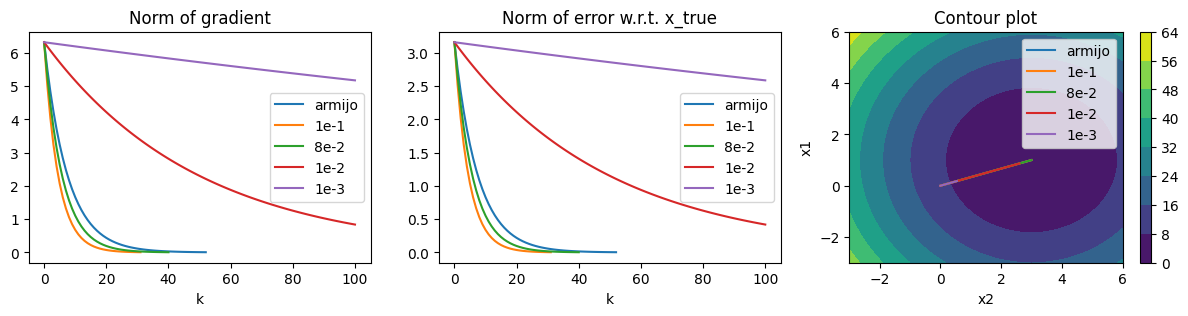

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for values in values_list:
    x, k, f_x, grad_x, err_x = gradient_descent(function_1, grad_1, np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

    axs[0].plot([np.linalg.norm(g) for g in grad_x])
    axs[1].plot([np.linalg.norm(xk - x_true) for xk in x])
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

axs[0].set_title("Norm of gradient")
axs[0].set_xlabel("k")

axs[1].set_title("Norm of error w.r.t. x_true")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")
xlist = np.linspace(-3.0, 6.0, 100)
ylist = np.linspace(-3.0, 6.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_1_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

for ax in axs:
    ax.legend([val["legend"] for val in values_list])

plt.show()

In [20]:
def function_2(x):
    x1, x2 = x[0], x[1]
    return 10*(x1-1)**2 + (x2-2)**2

def func_2_for_contour(x, y):
    return 10*(x-1)**2 + (y-2)**2

def grad_2(x):
    x1, x2 = x[0], x[1]
    return np.array([20*(x1-1),2*(x2-2)])

x_true = np.array([1, 2])

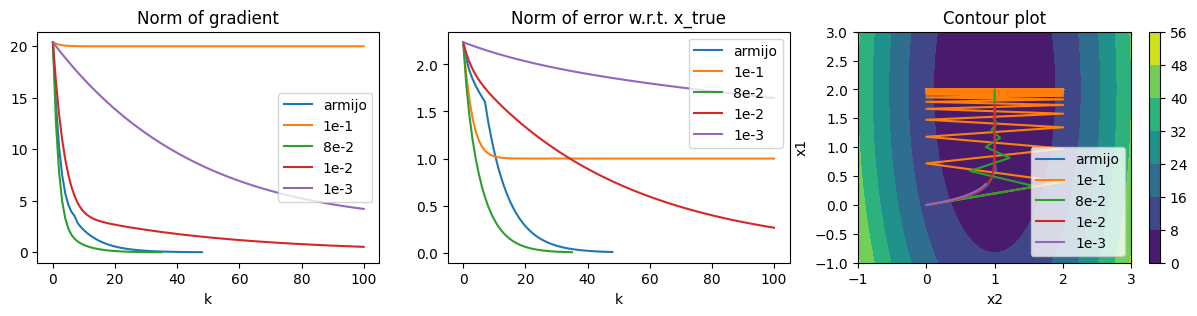

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for values in values_list:
    x, k, f_x, grad_x, err_x = gradient_descent(function_2, grad_2, np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

    axs[0].plot([np.linalg.norm(g) for g in grad_x])
    axs[1].plot([np.linalg.norm(xk - x_true) for xk in x])
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

axs[0].set_title("Norm of gradient")
axs[0].set_xlabel("k")

axs[1].set_title("Norm of error w.r.t. x_true")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")
xlist = np.linspace(-1.0, 3.0, 100)
ylist = np.linspace(-1.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_2_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

for ax in axs:
    ax.legend([val["legend"] for val in values_list])

plt.show()

In [6]:
def function_3(x):
    A = np.vander(x=)
    return 0.5*np.linalg.norm(A @ x - b)**2

def func_2_for_contour(x, y):
    return 10*(x-1)**2 + (y-2)**2

def grad_2(x):
    x1, x2 = x[0], x[1]
    return np.array([20*(x1-1),2*(x2-2)])

x_true = np.array([1, 2])

In [7]:
# function 4

In [8]:
# function 5
# also plot FUNC IN INTERVAL [-3, 3] and test CONVERGENCE WITH VARYING x0 and step sizes (observe when global / local minimum/maximum)